In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
#ignore warning messages
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

In [2]:
df=pd.read_csv("googleplaystore_user_reviews.csv")

In [3]:
#total no of Apps before cleaning
print(df.shape)
#Checking null value
print(df.isnull().values.any())

(64295, 5)
True


In [4]:
df=df.drop(['Sentiment_Polarity', 'Sentiment_Subjectivity'], axis=1)

In [5]:
#dropping the rows which has null value 
final = df.dropna(how='any',axis=0)

In [6]:
#printing shape after removing the rows which has null values
print(final.shape)
print(final.isnull().values.any())

(37427, 3)
False


Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64


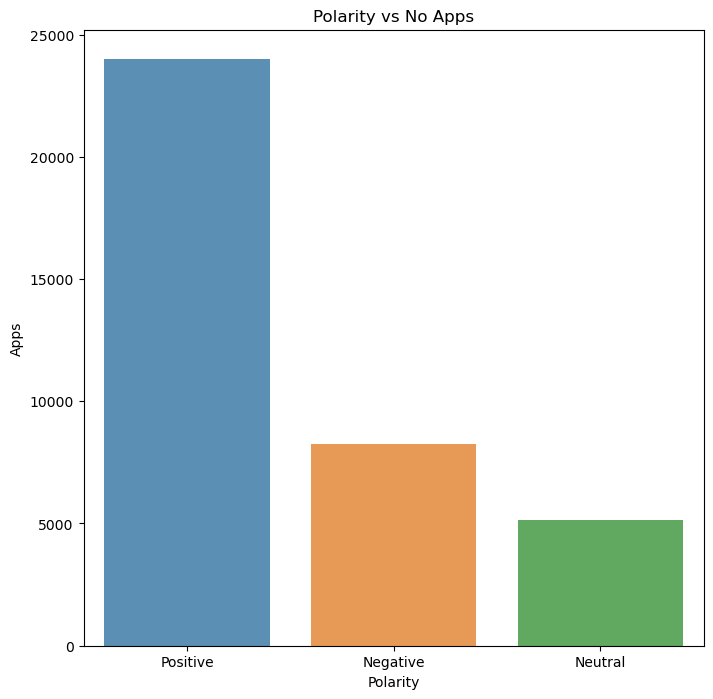

<Figure size 640x480 with 0 Axes>

In [8]:
Sentiment=final['Sentiment'].value_counts()
print(Sentiment)
plt.figure(figsize=(8,8))
sns.barplot(x=Sentiment.index, y=Sentiment.values, alpha=0.8)
plt.title('Polarity vs No Apps')
plt.ylabel('Apps')
plt.xlabel('Polarity')
plt.show()

plt.savefig("CRvsNoapps.png")

In [9]:
# find sentences containing HTML tags
import re
i=0;
for sent in final['Translated_Review'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        #print(sent)
        break;
    i += 1;

10319


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [11]:
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub('[^a-z]',r'', sentence)
    return  cleaned

In [12]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
all_neutral_words=[]
s=''
for sent in final['Translated_Review'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Sentiment'].values)[i] == 'Positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Sentiment'].values)[i] == 'Negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                    if(final['Sentiment'].values)[i] == 'Negative':
                        all_neutral_words.append(s) #list of all words used to describe negative reviews reviews    
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = filtered_sentence #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [13]:
# create a stopword list for this
stopword=["b'","I","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you",
           "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", 
           "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", 
           "their", "theirs", "themselves", "what", "which", "who", "whom", "this",
           "that", "these", "those", "am", "is", "are", "was", "were", "be", "been",
           "being", "have", "has", "had", "having", "do", "does", "did", "doing", 
           "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
           "of", "at", "by", "for", "with", "about", "against", "between", "into",
           "through", "during", "before", "after", "above", "below", "to", "from",
           "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", 
           "then", "once", "here", "there", "when", "where", "why", "how", "all", "any",
           "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", 
           "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can",
           "will", "just", "don", "should", "now","via","smart","get","black","entertainment","ireland","london","england",
              "scotland","wales","londonislovinit","one","gb","marked","white","new","today","bundle","still","day","back",
              "selected","logik","told","uk","home","ve","core","even","would","half","got","gold",
              "win","warriors","take","red","go","month","know","lg","jvc","ever","bought","extra",
              "tb","built","range","data","re","last","rt","need","stephen","night","want",
         "www","http","https","b'get'","b'app'","b'also'","Ok","b'game'","b'make'","b'like'","b'would'","b'use'","b'see'","b'thing'","b'say'","b'play'","b'good'","b'show'","b'give'","b'phone'","b'still'","b'realli'","b'time'","b'even'","b'tri'","b'work'","b'cant'","b'need'","b'want'"]

In [14]:
with open('neg.txt', 'w') as f:
    for item in all_negative_words:
        f.write("%s\n" % item)

with open('pos.txt', 'w') as f:
    for item in all_positive_words:
        f.write("%s\n" % item)
        
with open('neu.txt', 'w') as f:
    for item in all_neutral_words:
        f.write("%s\n" % item)

In [15]:
# remove stop words
filtered_words = [word for word in final['Translated_Review'] if word not in stopword]
count=0
for i in filtered_words:
    count+=1
count          

37387

In [16]:
# display the most frequent 25 words that has more than 1 letter
stop_word=nltk.FreqDist(w for w in filtered_words if len(w)>1)
print(stop_word.most_common(50))

[('Good', 247), ('Nice', 173), ('Great', 131), ('Love', 116), ('Awesome', 71), ('Very good', 69), ('I love', 66), ('I like', 56), ('good', 46), ('Cool', 42), ('Excellent', 37), ('Very nice', 35), ("It's good", 32), ('Thanks', 31), ('Super', 25), ('nice', 20), ('Best', 19), ('Very useful', 19), ('Thank', 19), ('Perfect', 17), ('Its good', 17), ('Like', 17), ('Easy', 16), ('It good', 16), ('Fun', 15), ("It's great", 14), ('I hate', 14), ('Rubbish', 14), ('The best', 14), ('Too many ads', 13), ('Very helpful', 13), ('Love it!', 13), ("It's cool", 13), ('So far good', 13), ('Amazing', 12), ('Very bad', 12), ('Nyc', 12), ('Its great', 10), ('Bad', 10), ('I like much', 10), ("It's nice", 10), ("It's ok", 10), ('great', 9), ('Fantastic', 9), ('Good game', 9), ('Very nice game', 9), ('Love game', 9), ('I love game', 9), ('Useful', 9), ('Helpful', 8)]


In [18]:
stopword_cloud=stopword

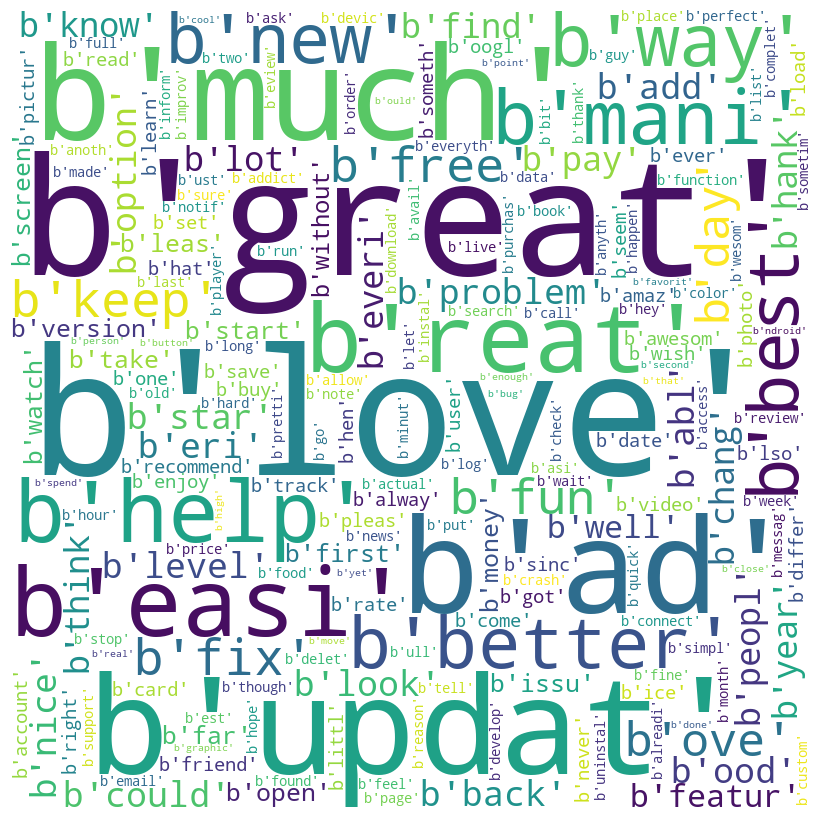

In [19]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt  
wordcloud = WordCloud(width = 800, height = 800, margin=2, background_color ='white', stopwords=stopword_cloud, collocations=False).generate(str(all_positive_words))                                                    
                                               
plt.figure( figsize=(10,8) )
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

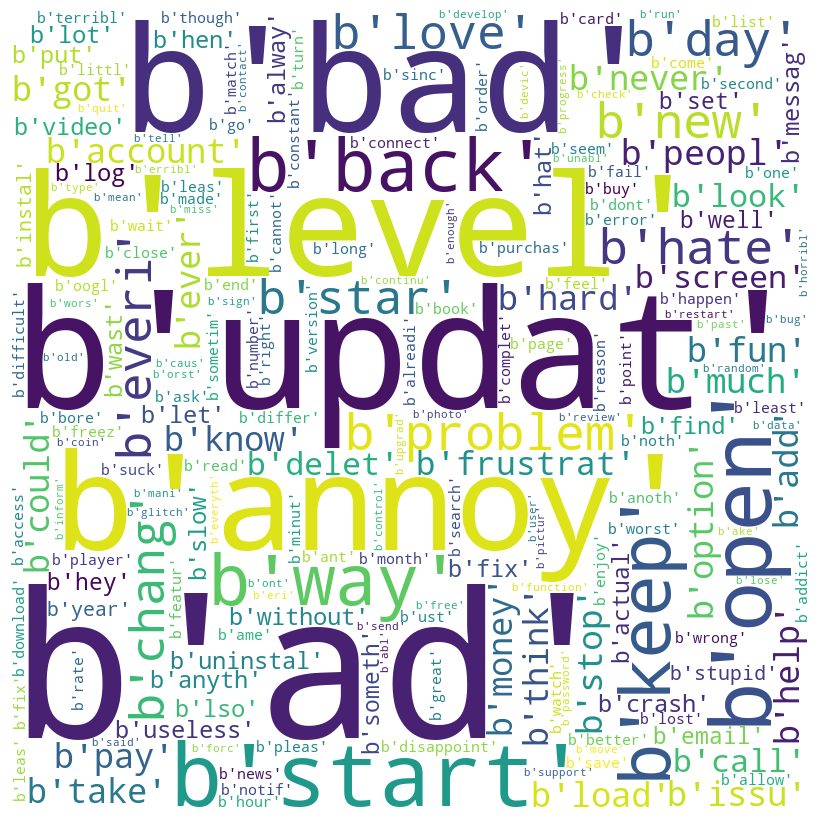

In [20]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt  
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', stopwords=stopword_cloud).generate(str(all_negative_words))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

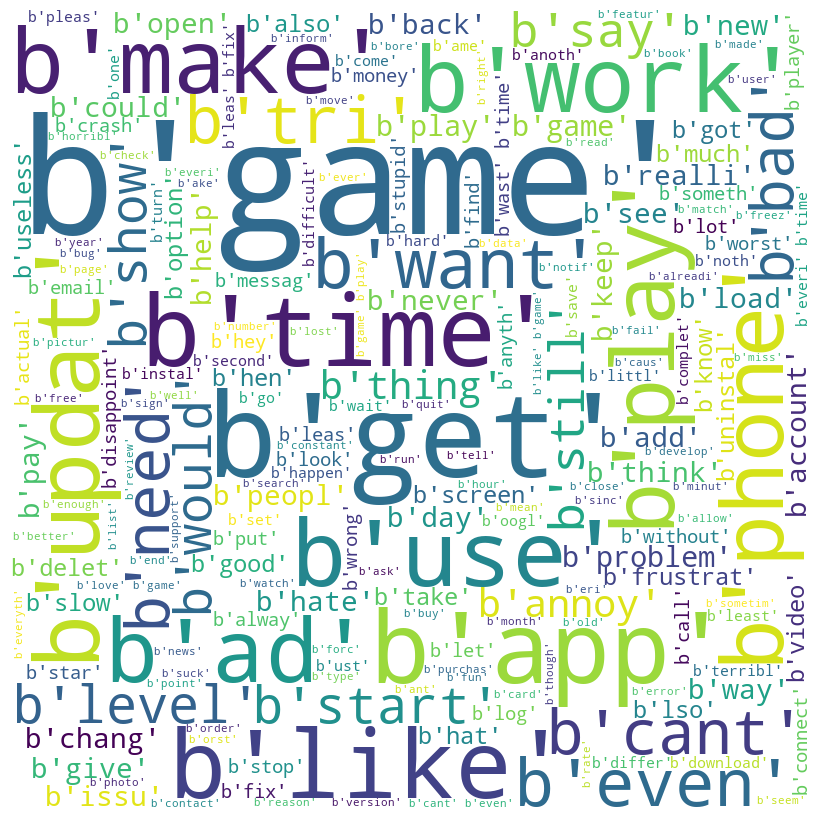

<Figure size 640x480 with 0 Axes>

In [21]:
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white').generate(str(all_neutral_words))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
plt.savefig("Neutral_WC.pdf")

In [22]:
final.head()

,App,Translated_Review,Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive
3,10 Best Foods for You,Works great especially going grocery store,Positive
4,10 Best Foods for You,Best idea us,Positive
5,10 Best Foods for You,Best way,Positive


In [23]:
from sklearn.model_selection import train_test_split
x=final["Translated_Review"]
y=final["Sentiment"]
x_tr,x_test,y_tr,y_test=train_test_split(x, y, test_size=0.2,shuffle=False)

In [24]:
print(x_tr.shape,x_test.shape,y_tr.shape,y_test.shape)

(29941,) (7486,) (29941,) (7486,)
